In [28]:
import os 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from anytree import Node, RenderTree

def print_anytree(anytree):
    for pre, fill, node in RenderTree(anytree):
        print(f"{pre}{node.name}")
        
def scan_neighbours_schedule_from_anytree_graph(anytree, G):
    """
    Scan recursively through the tree, starting from the root
    """
    order = []

    def scan_children(node):
        if len(node.children) > 0:
            children = node.children
            for c in children:
                order.append([node.name, c.name])
                if len(c.children) > 0:
                    scan_children(c)
        else:
            pass

    scan_children(anytree)

    print_anytree(anytree)

    scan_neighbours_schedule = []
    visited = []
    starting_node = order[0][0]
    for i in order:
        start, end = tuple(i)
        if start == starting_node:
            previous = starting_node
        else:
            previous = [x for x in visited if x[1] == start][0][0]
        visited.append(i)
        neighbours = [x for x in G.edges(start) if x[1] != end]
        schedule = [tuple(x) for x in order if x[0] == end]
        scan_neighbours_schedule.append(((previous, start, end), neighbours, schedule))

    return scan_neighbours_schedule

In [24]:
order_path = "/home/unibas/boittier/fdcm_project/mdcms/methanol/anytree.obj"
order = pd.read_pickle(order_path)
order

Node('/1')

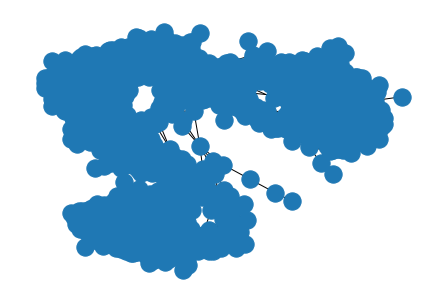

In [12]:
graph_path = "/home/unibas/boittier/fdcm_project/mdcms/methanol/H.obj"
G = pd.read_pickle(graph_path)
pos=nx.spring_layout(G)
nx.draw(G, pos=pos)

In [35]:
scan_neighbours_schedule = scan_neighbours_schedule_from_anytree_graph(order, G)

1
├── 1864
│   ├── 2211
│   │   ├── 1480
│   │   │   ├── 733
│   │   │   │   ├── 405
│   │   │   │   │   └── 190
│   │   │   │   │       ├── 617
│   │   │   │   │       │   ├── 2228
│   │   │   │   │       │   │   ├── 250
│   │   │   │   │       │   │   │   ├── 937
│   │   │   │   │       │   │   │   │   ├── 125
│   │   │   │   │       │   │   │   │   │   ├── 522
│   │   │   │   │       │   │   │   │   │   │   ├── 830
│   │   │   │   │       │   │   │   │   │   │   │   └── 976
│   │   │   │   │       │   │   │   │   │   │   │       └── 933
│   │   │   │   │       │   │   │   │   │   │   │           └── 767
│   │   │   │   │       │   │   │   │   │   │   │               └── 33
│   │   │   │   │       │   │   │   │   │   │   │                   ├── 1019
│   │   │   │   │       │   │   │   │   │   │   │                   │   ├── 603
│   │   │   │   │       │   │   │   │   │   │   │                   │   │   └── 1203
│   │   │   │   │       │   │   │   │   │   │   │                   │   │

In [21]:
degree_dict = {}
for n,d in G.degree():
    if d not in degree_dict.keys():
        degree_dict[d] = []
    degree_dict[d].append(n)
deg = degree_dict.keys()
deg = list(deg)
print(min(deg), max(deg))

1 10


[1, 335, 1481, 1864, 1906, 2081, 2418]


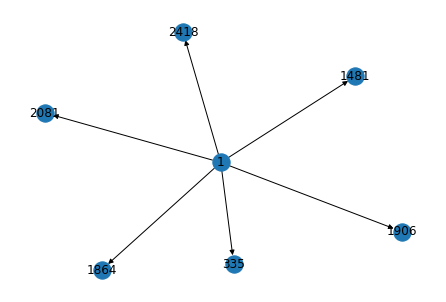

In [17]:
H = nx.dfs_tree(G, source=1, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[2418, 1, 1058, 1520, 2004, 2384]


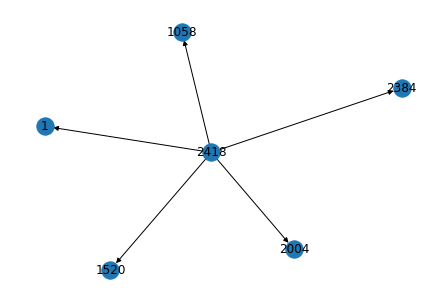

In [18]:
H = nx.dfs_tree(G, source=2418, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[1058, 412, 670, 1520, 1886, 2418]


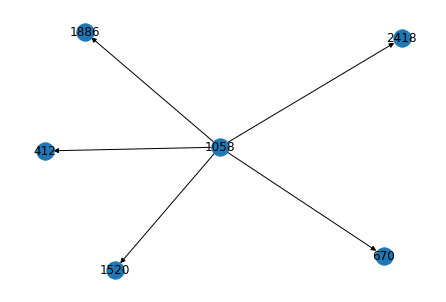

In [32]:
H = nx.dfs_tree(G, source=1058, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

[1886, 72, 412, 462, 567, 660, 1058, 1653, 1712, 1862]


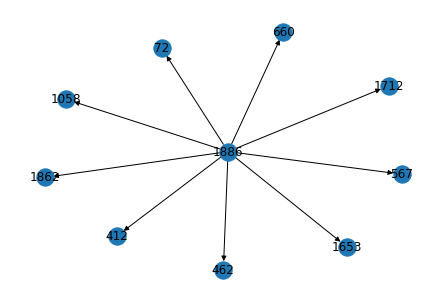

In [34]:
H = nx.dfs_tree(G, source=1886, depth_limit=1)
nx.draw(H, with_labels=True)
print(H.nodes)

In [39]:
len(scan_neighbours_schedule)

1775